In [1]:
from google.colab import drive

drive.mount('/content/drive/')

BASE_DIR = "/content/drive/MyDrive"
FOLDERNAME = "INFO494" 
DATA_DIR = f"{BASE_DIR}/{FOLDERNAME}"

Mounted at /content/drive/


# Explore Data

In [2]:
import pandas as pd

In [6]:
pd.to_datetime(1783179305159200982, unit="ns")


Timestamp('2026-07-04 15:35:05.159200982')

In [7]:
ratings = pd.read_csv(f'{DATA_DIR}/ratings-00001.tsv', sep='\t')

In [8]:
ratings.columns

Index(['noteId', 'raterParticipantId', 'createdAtMillis', 'version', 'agree',
       'disagree', 'helpful', 'notHelpful', 'helpfulnessLevel', 'helpfulOther',
       'helpfulInformative', 'helpfulClear', 'helpfulEmpathetic',
       'helpfulGoodSources', 'helpfulUniqueContext', 'helpfulAddressesClaim',
       'helpfulImportantContext', 'helpfulUnbiasedLanguage', 'notHelpfulOther',
       'notHelpfulIncorrect', 'notHelpfulSourcesMissingOrUnreliable',
       'notHelpfulOpinionSpeculationOrBias', 'notHelpfulMissingKeyPoints',
       'notHelpfulOutdated', 'notHelpfulHardToUnderstand',
       'notHelpfulArgumentativeOrBiased', 'notHelpfulOffTopic',
       'notHelpfulSpamHarassmentOrAbuse', 'notHelpfulIrrelevantSources',
       'notHelpfulOpinionSpeculation', 'notHelpfulNoteNotNeeded',
       'ratedOnTweetId', 'ratingSourceBucketed'],
      dtype='object')

In [11]:
status = pd.read_csv(f'{DATA_DIR}/noteStatusHistory-00000.tsv', sep='\t')

/tmp/ipython-input-136638196.py:1: DtypeWarning: Columns (10,19) have mixed types. Specify dtype option on import or set low_memory=False.
  status = pd.read_csv(f'{DATA_DIR}/noteStatusHistory-00000.tsv', sep='\t')


In [12]:
status.columns

Index(['noteId', 'noteAuthorParticipantId', 'createdAtMillis',
       'timestampMillisOfFirstNonNMRStatus', 'firstNonNMRStatus',
       'timestampMillisOfCurrentStatus', 'currentStatus',
       'timestampMillisOfLatestNonNMRStatus', 'mostRecentNonNMRStatus',
       'timestampMillisOfStatusLock', 'lockedStatus',
       'timestampMillisOfRetroLock', 'currentCoreStatus',
       'currentExpansionStatus', 'currentGroupStatus', 'currentDecidedBy',
       'currentModelingGroup', 'timestampMillisOfMostRecentStatusChange',
       'timestampMillisOfNmrDueToMinStableCrhTime', 'currentMultiGroupStatus',
       'currentModelingMultiGroup', 'timestampMinuteOfFinalScoringOutput',
       'timestampMillisOfFirstNmrDueToMinStableCrhTime'],
      dtype='object')

In [13]:
status.shape

(2571789, 23)

In [14]:
status = status[pd.to_datetime(status["createdAtMillis"], unit="ms") >= "2025-09-30"]


In [15]:
status.shape

(284584, 23)

In [ ]:
status.to_csv(
    f"{DATA_DIR}/filtered/status.tsv",
    sep="\t",
    index=False
)


In [17]:
import os
import pandas as pd

IN_DIR = DATA_DIR
OUT_DIR = f"{DATA_DIR}/filtered"

rating_files = sorted([
    f for f in os.listdir(IN_DIR)
    if f.startswith("ratings-") and f.endswith(".tsv")
])

print(f"Found {len(rating_files)} rating files")

for fname in rating_files:
    path = os.path.join(IN_DIR, fname)

    df = pd.read_csv(path, sep="\t")

    before_shape = df.shape

    df = df[
        pd.to_datetime(df["createdAtMillis"], unit="ms") >= "2025-09-30"
    ]

    after_shape = df.shape

    print(f"{fname}: {before_shape} → {after_shape}")

    out_path = os.path.join(OUT_DIR, fname)
    df.to_csv(out_path, sep="\t", index=False)

Found 20 rating files
ratings-00000.tsv: (14542907, 33) → (1694435, 33)
ratings-00001.tsv: (14487695, 33) → (1716425, 33)
ratings-00002.tsv: (14426534, 33) → (1698462, 33)
ratings-00003.tsv: (14627519, 33) → (1711998, 33)
ratings-00004.tsv: (14531358, 33) → (1718485, 33)
ratings-00005.tsv: (14244435, 33) → (1661567, 33)
ratings-00006.tsv: (14289333, 33) → (1636870, 33)
ratings-00007.tsv: (14243381, 33) → (1657626, 33)
ratings-00008.tsv: (14185148, 33) → (1668553, 33)
ratings-00009.tsv: (14372181, 33) → (1668742, 33)
ratings-00010.tsv: (5491568, 33) → (715325, 33)
ratings-00011.tsv: (5385669, 33) → (719140, 33)
ratings-00012.tsv: (5325452, 33) → (702589, 33)
ratings-00013.tsv: (5229363, 33) → (666115, 33)
ratings-00014.tsv: (5342305, 33) → (722859, 33)
ratings-00015.tsv: (5288997, 33) → (697292, 33)
ratings-00016.tsv: (5211828, 33) → (696548, 33)
ratings-00017.tsv: (5207518, 33) → (694063, 33)
ratings-00018.tsv: (4957548, 33) → (647440, 33)
ratings-00019.tsv: (4998117, 33) → (680126, 33

In [3]:
ratings = pd.read_csv(f'{DATA_DIR}/filtered/ratings-00019.tsv', sep='\t')

In [ ]:
ratings.head()

In [4]:
raterFactor = pd.read_csv(f'{DATA_DIR}/prescoringRaterModelOutput_1dim.tsv', sep='\t')

In [9]:
raterFactor.columns

Index(['raterParticipantId', 'internalRaterIntercept', 'internalRaterFactor1',
       'internalRaterFactor2', 'internalRaterFactor3', 'internalRaterFactor4',
       'internalRaterFactor5', 'crhCrnhRatioDifference', 'meanNoteScore',
       'raterAgreeRatio', 'aboveHelpfulnessThreshold', 'scorerName',
       'internalRaterReputation', 'lowDiligenceRaterIntercept',
       'lowDiligenceRaterFactor1', 'lowDiligenceRaterReputation',
       'lowDiligenceRaterInterceptRound2', 'incorrectTagRatingsMadeByRater',
       'totalRatingsMadeByRater', 'postSelectionValue',
       'successfulRatingHelpfulCount', 'successfulRatingNotHelpfulCount',
       'unsuccessfulRatingHelpfulCount', 'unsuccessfulRatingNotHelpfulCount',
       'totalHelpfulHarassmentPenalty',
       'raterAgreeRatioKeyWithHarassmentAbusePenalty', 'quasiCliqueValue'],
      dtype='object')

In [ ]:
f"{DATA_DIR}/filtered/"

In [5]:
ratings = pd.read_csv(f'{DATA_DIR}/filtered/ratings-00019.tsv', sep='\t')

In [ ]:
ratings.head()

In [6]:
ratings.columns

Index(['noteId', 'raterParticipantId', 'createdAtMillis', 'version', 'agree',
       'disagree', 'helpful', 'notHelpful', 'helpfulnessLevel', 'helpfulOther',
       'helpfulInformative', 'helpfulClear', 'helpfulEmpathetic',
       'helpfulGoodSources', 'helpfulUniqueContext', 'helpfulAddressesClaim',
       'helpfulImportantContext', 'helpfulUnbiasedLanguage', 'notHelpfulOther',
       'notHelpfulIncorrect', 'notHelpfulSourcesMissingOrUnreliable',
       'notHelpfulOpinionSpeculationOrBias', 'notHelpfulMissingKeyPoints',
       'notHelpfulOutdated', 'notHelpfulHardToUnderstand',
       'notHelpfulArgumentativeOrBiased', 'notHelpfulOffTopic',
       'notHelpfulSpamHarassmentOrAbuse', 'notHelpfulIrrelevantSources',
       'notHelpfulOpinionSpeculation', 'notHelpfulNoteNotNeeded',
       'ratedOnTweetId', 'ratingSourceBucketed'],
      dtype='object')

In [7]:
status = pd.read_csv(f'{DATA_DIR}/filtered/status.tsv', sep='\t')

/tmp/ipython-input-4287920967.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  status = pd.read_csv(f'{DATA_DIR}/filtered/status.tsv', sep='\t')


In [8]:
status.columns

Index(['noteId', 'noteAuthorParticipantId', 'createdAtMillis',
       'timestampMillisOfFirstNonNMRStatus', 'firstNonNMRStatus',
       'timestampMillisOfCurrentStatus', 'currentStatus',
       'timestampMillisOfLatestNonNMRStatus', 'mostRecentNonNMRStatus',
       'timestampMillisOfStatusLock', 'lockedStatus',
       'timestampMillisOfRetroLock', 'currentCoreStatus',
       'currentExpansionStatus', 'currentGroupStatus', 'currentDecidedBy',
       'currentModelingGroup', 'timestampMillisOfMostRecentStatusChange',
       'timestampMillisOfNmrDueToMinStableCrhTime', 'currentMultiGroupStatus',
       'currentModelingMultiGroup', 'timestampMinuteOfFinalScoringOutput',
       'timestampMillisOfFirstNmrDueToMinStableCrhTime'],
      dtype='object')

# Join Ratings and create Pre-Post Stage

In [10]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import glob

rating_files = sorted(glob.glob(f"{DATA_DIR}/filtered/ratings-*.tsv"))

all_stage_data = []


In [ ]:
for file in tqdm(rating_files):
    df = pd.read_csv(
        file,
        sep="\t",
        usecols=["noteId", "raterParticipantId",
                 "createdAtMillis", "ratingSourceBucketed"]
    )

    # merge status
    df = df.merge(
        status[["noteId",
                "timestampMillisOfFirstNonNMRStatus"]],
        on="noteId",
        how="left"
    )

    # tag stage
    df["stage"] = np.where(
        df["createdAtMillis"] <
        df["timestampMillisOfFirstNonNMRStatus"],
        "pre",
        "post"
    )

    # merge rater factor
    df = df.merge(
        raterFactor[["raterParticipantId",
                     "internalRaterFactor1"]],
        on="raterParticipantId",
        how="left"
    )

    all_stage_data.append(df)

ratings_all = pd.concat(all_stage_data, ignore_index=True)


100%|██████████| 20/20 [01:42<00:00,  5.13s/it]


# Global Distribution Plot

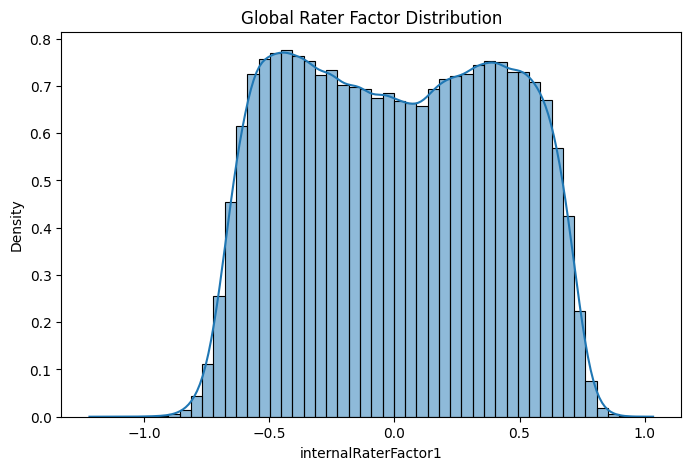

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

global_df = ratings_all[["raterParticipantId",
                         "internalRaterFactor1"]].drop_duplicates()

plt.figure(figsize=(8,5))
sns.histplot(global_df["internalRaterFactor1"],
             bins=50,
             stat="density",
             kde=True)
plt.title("Global Rater Factor Distribution")
plt.xlabel("internalRaterFactor1")
plt.show()


# Pre-Post Ratings Density Plot

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plot_df = ratings_all[[
    "stage", "ratingSourceBucketed", "internalRaterFactor1"
]].dropna(subset=["stage", "internalRaterFactor1"]).copy()

plot_df = plot_df[plot_df["ratingSourceBucketed"].isin(["DEFAULT", "POPULATION_SAMPLED"])].copy()

plot_df["row_group"] = plot_df["ratingSourceBucketed"].map({
    "DEFAULT": "Interested Raters",
    "POPULATION_SAMPLED": "Nudged Raters"
})


xmin = np.nanpercentile(plot_df["internalRaterFactor1"], 1)
xmax = np.nanpercentile(plot_df["internalRaterFactor1"], 99)

row_order = ["Interested + Nudged Raters", "Nudged Raters", "Interested Raters"]
col_order = ["pre", "post"]
col_titles = {"pre": "Before status", "post": "After status"}


In [19]:
ratings_all["ratingSourceBucketed"].value_counts(dropna=False)


,count
ratingSourceBucketed,
DEFAULT,23245579
POPULATION_SAMPLED,529081


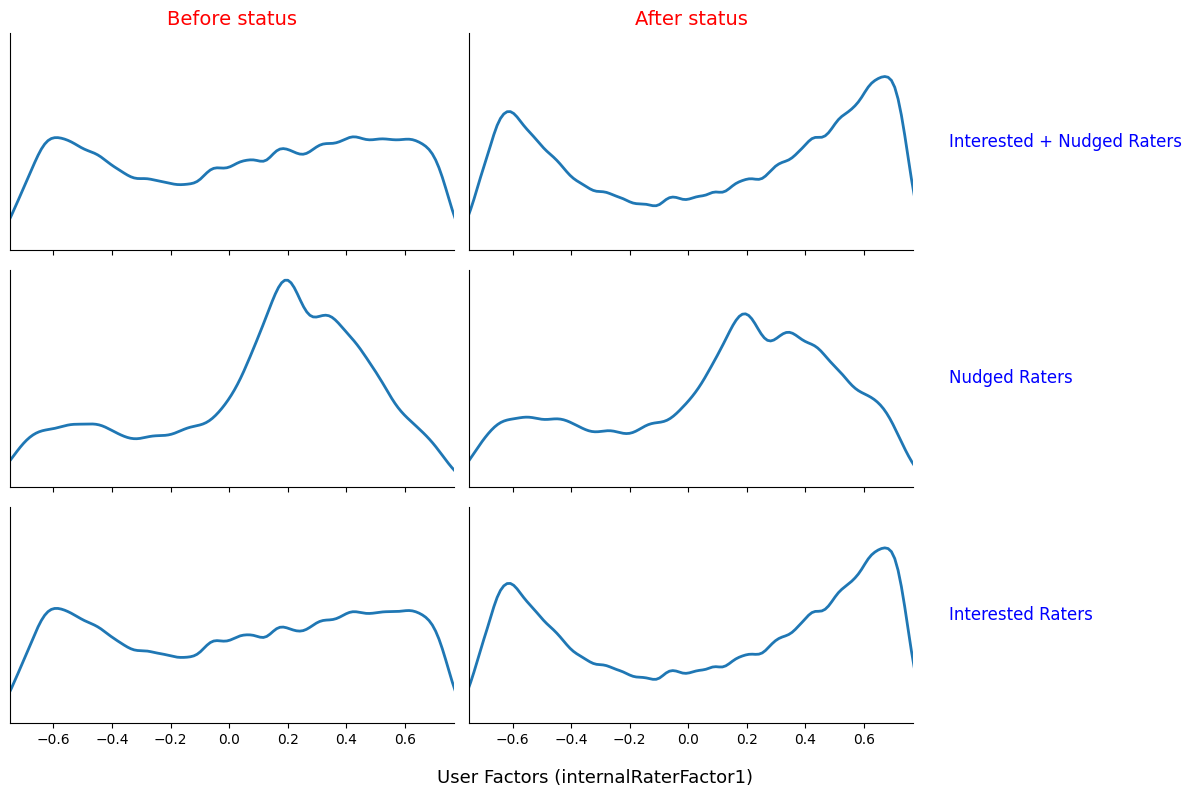

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8), sharex=True, sharey=True)

for r, row_name in enumerate(row_order):
    for c, stage in enumerate(col_order):
        ax = axes[r, c]

        if row_name == "Interested + Nudged Raters":
            sub = plot_df[plot_df["stage"] == stage]
        elif row_name == "Interested Raters":
            sub = plot_df[(plot_df["stage"] == stage) &
                          (plot_df["ratingSourceBucketed"] == "DEFAULT")]
        else:
            sub = plot_df[(plot_df["stage"] == stage) &
                          (plot_df["ratingSourceBucketed"] == "POPULATION_SAMPLED")]

        if len(sub) >= 50:
            sns.kdeplot(
                data=sub,
                x="internalRaterFactor1",
                ax=ax,
                bw_adjust=1.0,
                cut=0,
                fill=False,
                linewidth=2
            )

        ax.set_xlim(xmin, xmax)
        ax.set_ylabel("")
        ax.set_xlabel("")

        if r == 0:
            ax.set_title(col_titles[stage], fontsize=14, color="red")

        if c == 1:
            ax.text(
                1.08, 0.5, row_name,
                ha="left", va="center",
                transform=ax.transAxes,
                fontsize=12,
                color="blue"
            )

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_yticks([])

fig.supxlabel("User Factors (internalRaterFactor1)", fontsize=13)

plt.tight_layout()
plt.show()


# Explore all ratings

In [21]:
ratings_all.to_csv(f"{DATA_DIR}/filtered/ratings_all.tsv", sep = "\t", index=False)

In [25]:
ratings_all.shape

(23774660, 7)

In [26]:
ratings_all.columns

Index(['noteId', 'raterParticipantId', 'createdAtMillis',
       'ratingSourceBucketed', 'timestampMillisOfFirstNonNMRStatus', 'stage',
       'internalRaterFactor1'],
      dtype='object')

In [29]:
ratings_all["raterParticipantId"].nunique()

750091

In [30]:
ratings_all.groupby(
    ["stage", "ratingSourceBucketed"]
)["raterParticipantId"].nunique()


stage  ratingSourceBucketed
post   DEFAULT                 704146
       POPULATION_SAMPLED      125198
pre    DEFAULT                 467107
       POPULATION_SAMPLED       56281
Name: raterParticipantId, dtype: int64

In [31]:
check = ratings_all.groupby("raterParticipantId")["internalRaterFactor1"].nunique()

check.value_counts().head()


,count
internalRaterFactor1,
0,462297
1,287794


62% user has no factor. So the graph above only covers 38% of the users. Since factor scores are calculated early, new users won't be captured.

Each rating is treated as one observation, the distribution is weighted by rating activity rather than individual users.
- Highly active users contribute multiple times to the density curve
- less active users contribute less. 

! This figure reflects the structure of rating behavior, not the structure of the user population. 



# Pre-Post Rater Density Plot

In [32]:
unique_raters = ratings_all[
    ["raterParticipantId", "internalRaterFactor1"]
].drop_duplicates()


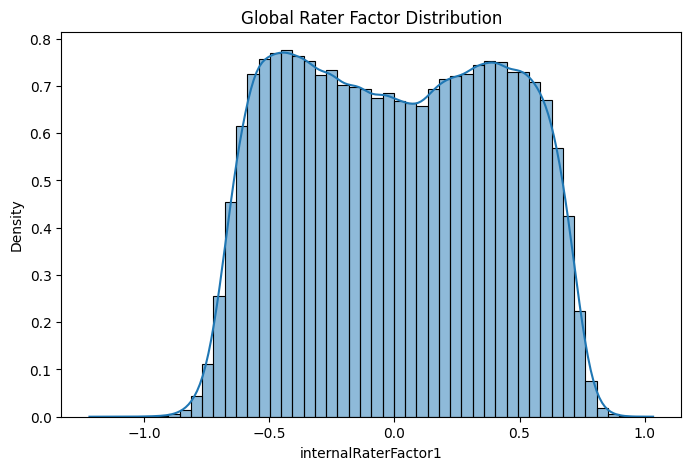

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(
    unique_raters["internalRaterFactor1"],
    bins=50,
    kde=True,
    stat="density"
)

plt.title("Global Rater Factor Distribution")
plt.xlabel("internalRaterFactor1")
plt.show()

In [36]:
plot_df = ratings_all[[
    "raterParticipantId", "stage", "ratingSourceBucketed", "internalRaterFactor1"
]].dropna(subset=["stage", "internalRaterFactor1"]).copy()

plot_df = plot_df[plot_df["ratingSourceBucketed"].isin(["DEFAULT", "POPULATION_SAMPLED"])].copy()

plot_df = plot_df.drop_duplicates(["stage", "ratingSourceBucketed", "raterParticipantId"])


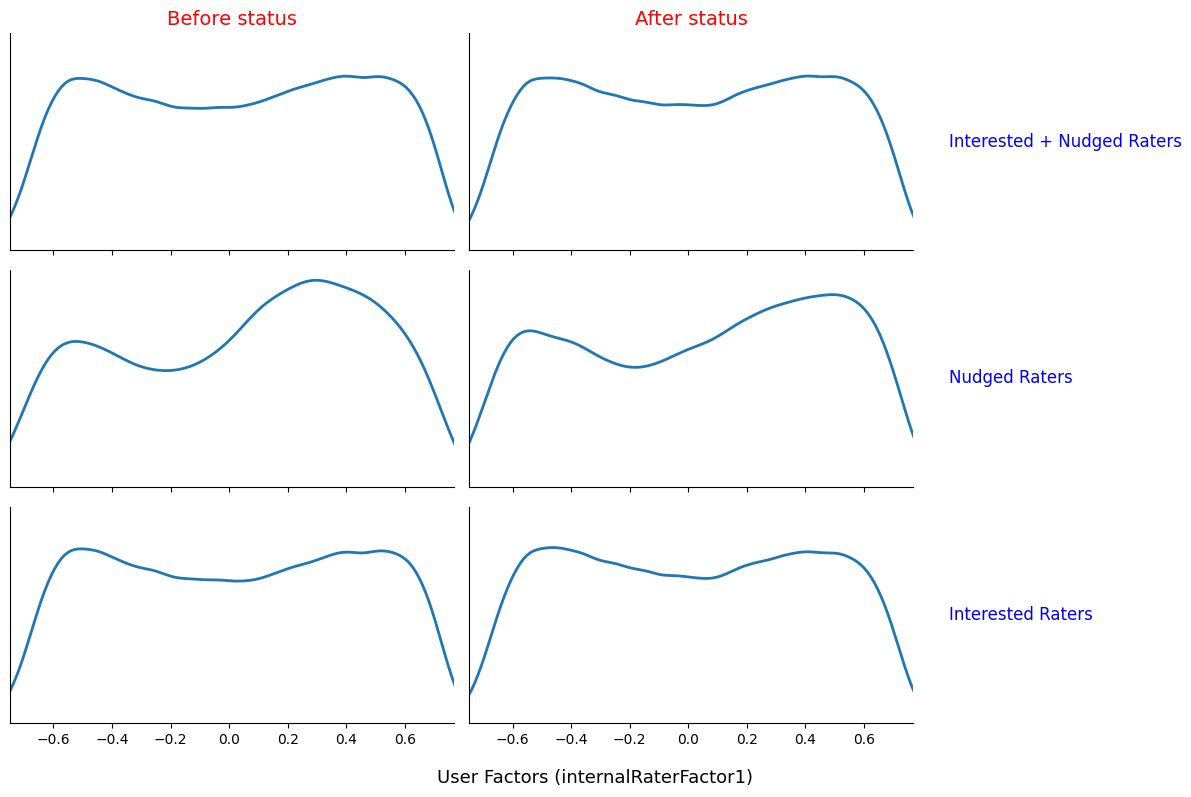

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8), sharex=True, sharey=True)

for r, row_name in enumerate(row_order):
    for c, stage in enumerate(col_order):
        ax = axes[r, c]

        if row_name == "Interested + Nudged Raters":
            sub = plot_df[plot_df["stage"] == stage]
        elif row_name == "Interested Raters":
            sub = plot_df[(plot_df["stage"] == stage) &
                          (plot_df["ratingSourceBucketed"] == "DEFAULT")]
        else:
            sub = plot_df[(plot_df["stage"] == stage) &
                          (plot_df["ratingSourceBucketed"] == "POPULATION_SAMPLED")]

        if len(sub) >= 50:
            sns.kdeplot(
                data=sub,
                x="internalRaterFactor1",
                ax=ax,
                bw_adjust=1.0,
                cut=0,
                fill=False,
                linewidth=2
            )

        ax.set_xlim(xmin, xmax)
        ax.set_ylabel("")
        ax.set_xlabel("")

        if r == 0:
            ax.set_title(col_titles[stage], fontsize=14, color="red")

        if c == 1:
            ax.text(
                1.08, 0.5, row_name,
                ha="left", va="center",
                transform=ax.transAxes,
                fontsize=12,
                color="blue"
            )

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_yticks([])

fig.supxlabel("User Factors (internalRaterFactor1)", fontsize=13)

plt.tight_layout()
plt.show()


In [38]:
plot_df.shape

(522951, 4)

In [39]:
plot_df["raterParticipantId"].nunique()

287794

# Note Level Entropy

In [40]:
ratings_all.columns

Index(['noteId', 'raterParticipantId', 'createdAtMillis',
       'ratingSourceBucketed', 'timestampMillisOfFirstNonNMRStatus', 'stage',
       'internalRaterFactor1'],
      dtype='object')

In [41]:
ratings_all.columns

Index(['noteId', 'raterParticipantId', 'createdAtMillis',
       'ratingSourceBucketed', 'timestampMillisOfFirstNonNMRStatus', 'stage',
       'internalRaterFactor1'],
      dtype='object')

In [42]:
ratings_all.shape

(23774660, 7)

In [45]:
ratings_all = ratings_all.dropna(subset=["stage", "internalRaterFactor1"]).copy()

ratings_all = ratings_all[ratings_all["ratingSourceBucketed"].isin(["DEFAULT", "POPULATION_SAMPLED"])].copy()

ratings_all = ratings_all.drop_duplicates(["stage", "ratingSourceBucketed", "raterParticipantId"])


In [46]:
ratings_all.columns

Index(['noteId', 'raterParticipantId', 'createdAtMillis',
       'ratingSourceBucketed', 'timestampMillisOfFirstNonNMRStatus', 'stage',
       'internalRaterFactor1'],
      dtype='object')

In [47]:
ratings_all.shape

(522951, 7)

In [48]:
import numpy as np

def normalized_entropy(values, bins=10):
    if len(values) < 5:
        return np.nan
    
    hist, _ = np.histogram(values, bins=bins)
    p = hist / hist.sum()
    p = p[p > 0]
    
    H = -np.sum(p * np.log(p))
    H_norm = H / np.log(bins)
    return H_norm


In [49]:
group_cols = ["noteId", "stage", "ratingSourceBucketed"]

entropy_df = (
    ratings_all
    .groupby(group_cols)["internalRaterFactor1"]
    .apply(lambda x: normalized_entropy(x, bins=10))
    .reset_index(name="entropy")
)


In [50]:
avg_entropy = (
    entropy_df
    .groupby(["stage", "ratingSourceBucketed"])["entropy"]
    .mean()
    .reset_index()
)

print(avg_entropy)


  stage ratingSourceBucketed   entropy
0  post              DEFAULT  0.712892
1  post   POPULATION_SAMPLED  0.688489
2   pre              DEFAULT  0.722129
3   pre   POPULATION_SAMPLED  0.699455


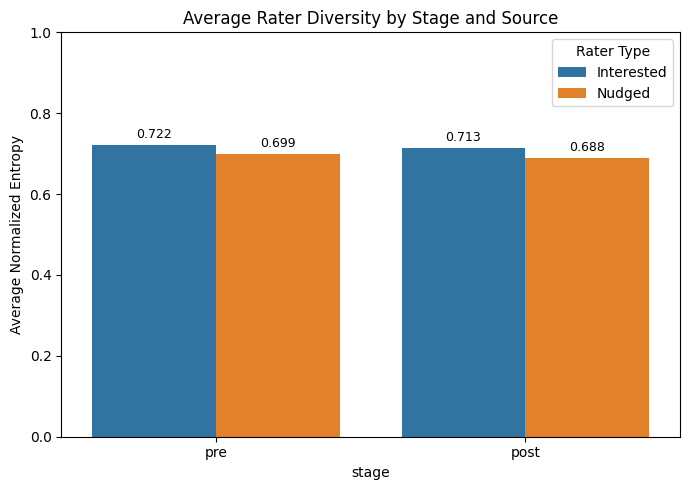

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_entropy = avg_entropy.copy()
plot_entropy["source_label"] = plot_entropy["ratingSourceBucketed"].map({
    "DEFAULT": "Interested",
    "POPULATION_SAMPLED": "Nudged"
})

plt.figure(figsize=(7,5))

ax = sns.barplot(
    data=plot_entropy,
    x="stage",
    y="entropy",
    hue="source_label",
    order=["pre", "post"]
)

ax.set_ylim(0, 1)

plt.ylabel("Average Normalized Entropy")
plt.title("Average Rater Diversity by Stage and Source")

plt.legend(title="Rater Type", loc="upper right")


for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        ax.annotate(
            f"{height:.3f}",
            (p.get_x() + p.get_width() / 2., height),
            ha='center',
            va='bottom',
            fontsize=9,
            xytext=(0, 3),
            textcoords='offset points'
        )

plt.tight_layout()
plt.show()


Pre raters are more diversed. Nudging decreased the diversity.

# Variance

In [57]:
group_cols = ["noteId", "stage", "ratingSourceBucketed"]

var_df = (
    ratings_all
    .groupby(group_cols)["internalRaterFactor1"]
    .agg(["std", "var"])
    .reset_index()
)


In [58]:
avg_var = (
    var_df
    .groupby(["stage", "ratingSourceBucketed"])
    .mean()
    .reset_index()
)

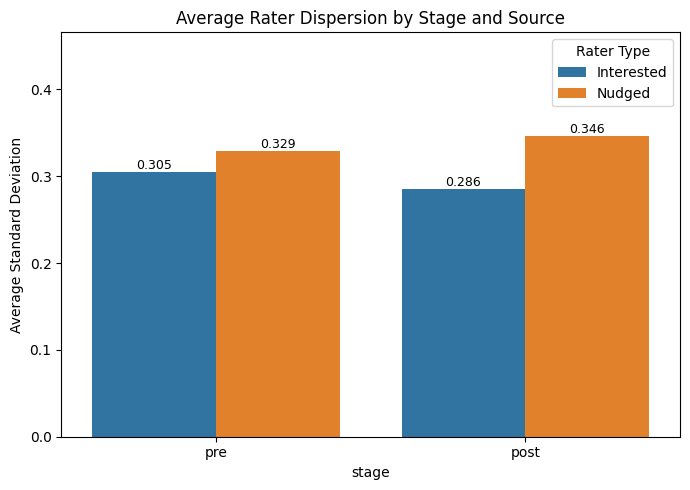

In [63]:
plot_var = avg_var.copy()
plot_var["source_label"] = plot_var["ratingSourceBucketed"].map({
    "DEFAULT": "Interested",
    "POPULATION_SAMPLED": "Nudged"
})

plt.figure(figsize=(7,5))

ax = sns.barplot(
    data=plot_var,
    x="stage",
    y="std",
    hue="source_label",
    order=["pre", "post"]
)

ax.set_ylim(0, plot_var["std"].max()*1.2+0.05)

plt.ylabel("Average Standard Deviation")
plt.title("Average Rater Dispersion by Stage and Source")

plt.legend(title="Rater Type", loc="upper right")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f"{height:.3f}",
            (p.get_x() + p.get_width()/2, height),
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.tight_layout()
plt.show()


1. Nudged raters exhibit consistently higher dispersion than organically interested raters.

2. After status, interested raters become slightly more concentrated.

3. But nudged rates become more disperse

# Rao

In [69]:
import numpy as np

def rao_distance_fast(x):
    x = np.sort(x)
    n = len(x)
    if n < 2:
        return np.nan
    
    coef = 2 / (n * (n - 1))
    cum = np.cumsum(x)
    total = 0
    
    for i in range(1, n):
        total += x[i] * i - cum[i - 1]
    
    return coef * total


In [64]:
dedup = ratings_all.drop_duplicates(
    ["noteId", "stage", "ratingSourceBucketed", "raterParticipantId"]
)

note_counts = (
    dedup
    .groupby(["noteId", "stage", "ratingSourceBucketed"])
    .size()
    .reset_index(name="n_raters")
)


In [75]:
top_notes = (
    note_counts
    .sort_values("n_raters", ascending=False)
    .head(5)
)

tail_notes = (
    note_counts[note_counts["n_raters"] >= 5]
    .sort_values("n_raters", ascending=True)
    .head(5)
)

In [76]:
top_note_ids = top_notes["noteId"].unique()

top_data = dedup[dedup["noteId"].isin(top_note_ids)]

tail_notes_id = tail_notes["noteId"].unique()

tail_data = dedup[dedup["noteId"].isin(tail_notes_id)]


In [77]:
rao_top = (
    top_data
    .groupby(["noteId", "stage", "ratingSourceBucketed"])["internalRaterFactor1"]
    .apply(lambda x: rao_distance_fast(x.values))
    .reset_index(name="rao")
)


rao_tail = (
    tail_data
    .groupby(["noteId", "stage", "ratingSourceBucketed"])["internalRaterFactor1"]
    .apply(lambda x: rao_distance_fast(x.values))
    .reset_index(name="rao")
)


## Rao boxplot

<Axes: xlabel='stage', ylabel='rao'>

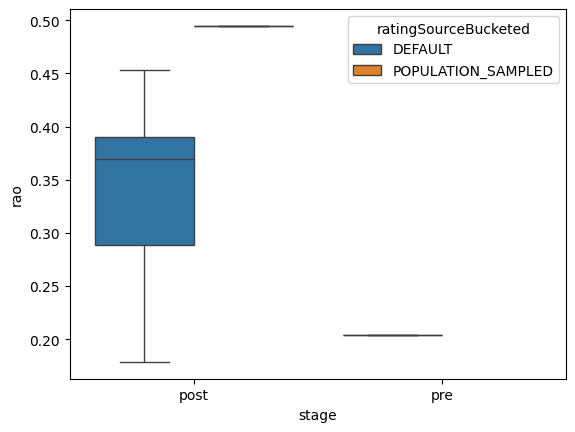

In [78]:
sns.boxplot(
    data=rao_top,
    x="stage",
    y="rao",
    hue="ratingSourceBucketed"
)


<Axes: xlabel='stage', ylabel='rao'>

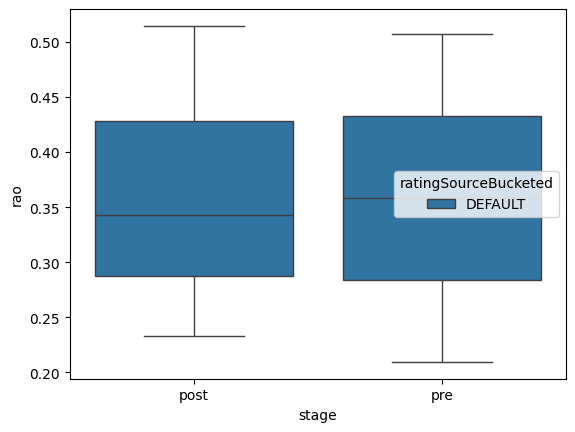

In [79]:
sns.boxplot(
    data=rao_tail,
    x="stage",
    y="rao",
    hue="ratingSourceBucketed"
)


## Rao VS Rater Num

<Axes: xlabel='n_raters', ylabel='rao'>

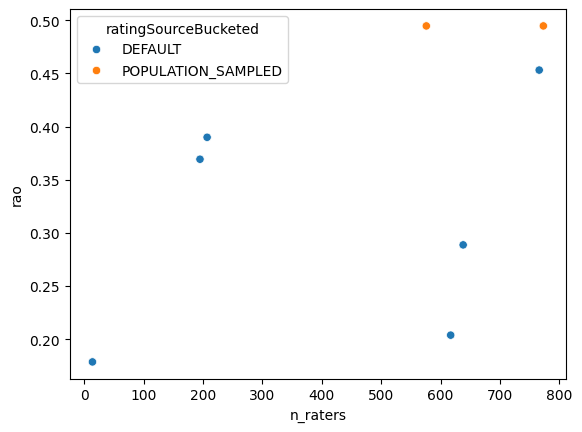

In [80]:
merged = rao_top.merge(
    note_counts,
    on=["noteId", "stage", "ratingSourceBucketed"]
)

sns.scatterplot(
    data=merged,
    x="n_raters",
    y="rao",
    hue="ratingSourceBucketed"
)


<Axes: xlabel='n_raters', ylabel='rao'>

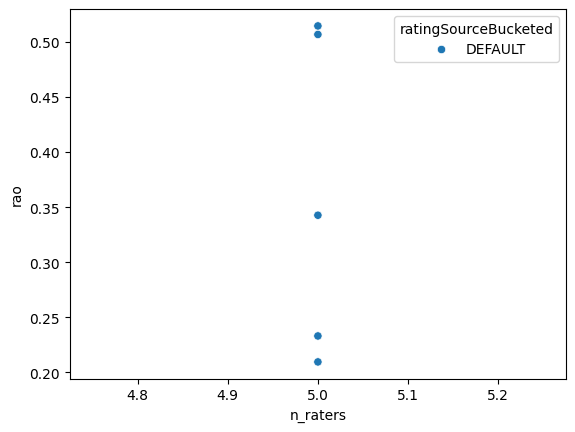

In [81]:
merged = rao_tail.merge(
    note_counts,
    on=["noteId", "stage", "ratingSourceBucketed"]
)

sns.scatterplot(
    data=merged,
    x="n_raters",
    y="rao",
    hue="ratingSourceBucketed"
)


# Flip

In [82]:
status["flip"] = (
    status["firstNonNMRStatus"] !=
    status["mostRecentNonNMRStatus"]
).astype(int)


In [ ]:
entropy_wide = entropy_df.pivot_table(
    index="noteId",
    columns="stage",
    values="entropy"
).reset_index()

entropy_wide.columns = ["noteId", "entropy_post", "entropy_pre"]


In [90]:
note_level = entropy_wide.merge(
    status[["noteId", "flip"]],
    on="noteId",
    how="left"
)


In [92]:
note_level.groupby("flip")[["entropy_pre", "entropy_post"]].mean()


,entropy_pre,entropy_post
flip,,
0.0,0.718711,0.729631
1.0,0.630752,0.704575


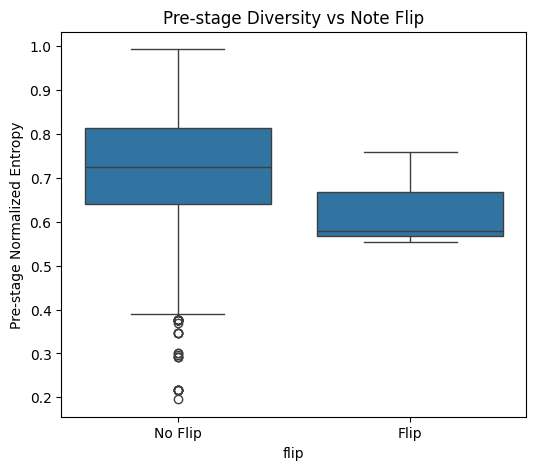

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

sns.boxplot(
    data=note_level,
    x="flip",
    y="entropy_pre"
)

plt.xticks([0,1], ["No Flip", "Flip"])
plt.ylabel("Pre-stage Normalized Entropy")
plt.title("Pre-stage Diversity vs Note Flip")

plt.show()


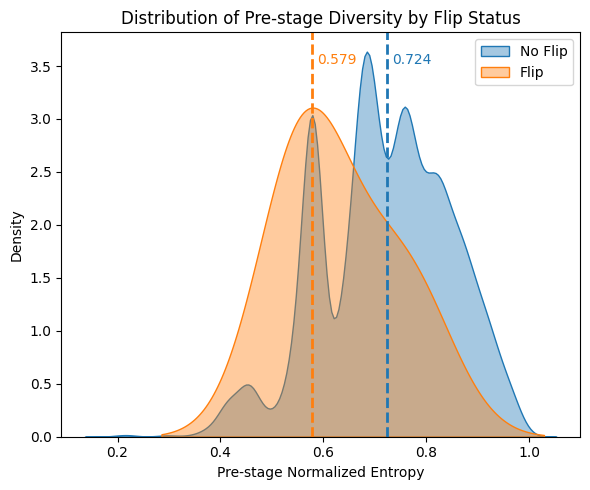

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))

color_no = sns.color_palette()[0]
color_flip = sns.color_palette()[1]

sns.kdeplot(
    data=note_level[note_level["flip"]==0],
    x="entropy_pre",
    label="No Flip",
    fill=True,
    alpha=0.4,
    color=color_no
)

sns.kdeplot(
    data=note_level[note_level["flip"]==1],
    x="entropy_pre",
    label="Flip",
    fill=True,
    alpha=0.4,
    color=color_flip
)


median_no = note_level[note_level["flip"]==0]["entropy_pre"].median()
median_flip = note_level[note_level["flip"]==1]["entropy_pre"].median()

ymax = plt.gca().get_ylim()[1]

plt.axvline(median_no, linestyle="--", linewidth=2, color=color_no)
plt.axvline(median_flip, linestyle="--", linewidth=2, color=color_flip)

offset = 0.01  

plt.text(
    median_no + offset,
    ymax * 0.95,
    f"{median_no:.3f}",
    color=color_no,
    va="top"
)

plt.text(
    median_flip + offset,
    ymax * 0.95,
    f"{median_flip:.3f}",
    color=color_flip,
    va="top"
)

plt.xlabel("Pre-stage Normalized Entropy")
plt.title("Distribution of Pre-stage Diversity by Flip Status")
plt.legend()
plt.tight_layout()
plt.show()


Notes that eventually flip exhibit substantially lower rater diversity in the pre-status phase compared to notes that remain stable.

## FLip post

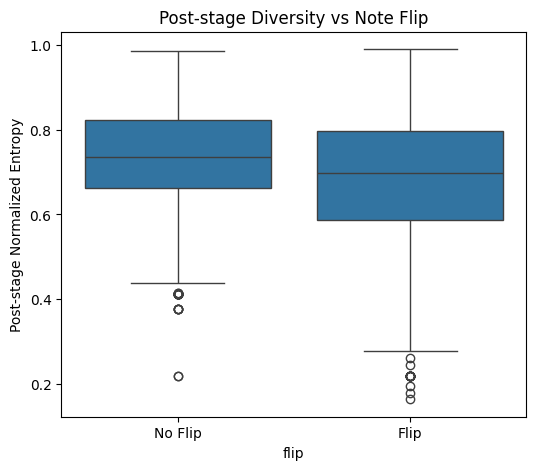

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

sns.boxplot(
    data=note_level,
    x="flip",
    y="entropy_post"
)

plt.xticks([0,1], ["No Flip", "Flip"])
plt.ylabel("Post-stage Normalized Entropy")
plt.title("Post-stage Diversity vs Note Flip")

plt.show()


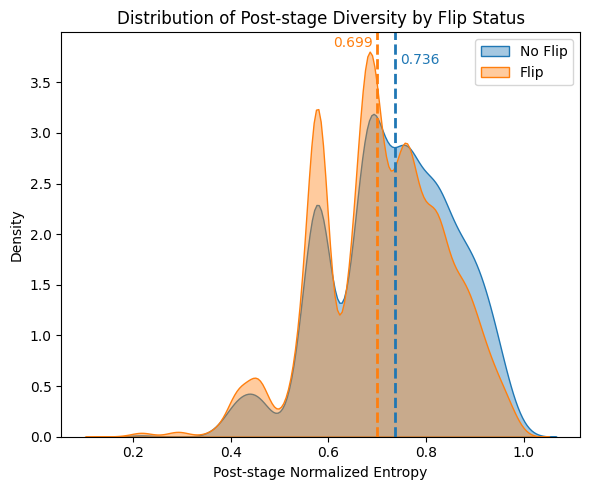

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))

color_no = sns.color_palette()[0]
color_flip = sns.color_palette()[1]

sns.kdeplot(
    data=note_level[note_level["flip"]==0],
    x="entropy_post",
    label="No Flip",
    fill=True,
    alpha=0.4,
    color=color_no
)

sns.kdeplot(
    data=note_level[note_level["flip"]==1],
    x="entropy_post",
    label="Flip",
    fill=True,
    alpha=0.4,
    color=color_flip
)


median_no = note_level[note_level["flip"]==0]["entropy_post"].median()
median_flip = note_level[note_level["flip"]==1]["entropy_post"].median()

ymax = plt.gca().get_ylim()[1]

plt.axvline(median_no, linestyle="--", linewidth=2, color=color_no)
plt.axvline(median_flip, linestyle="--", linewidth=2, color=color_flip)

offset = 0.01  

plt.text(
    median_no + offset,
    ymax * 0.95,
    f"{median_no:.3f}",
    color=color_no,
    va="top"
)

plt.text(
    median_flip - 0.09,
    ymax * 0.99,
    f"{median_flip:.3f}",
    color=color_flip,
    va="top"
)

plt.xlabel("Post-stage Normalized Entropy")
plt.title("Distribution of Post-stage Diversity by Flip Status")
plt.legend()
plt.tight_layout()
plt.show()
